In [284]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Loading the data

In [285]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [286]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

# Data Exploration

In [287]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [288]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [289]:
X_train.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Missing Data

<Axes: >

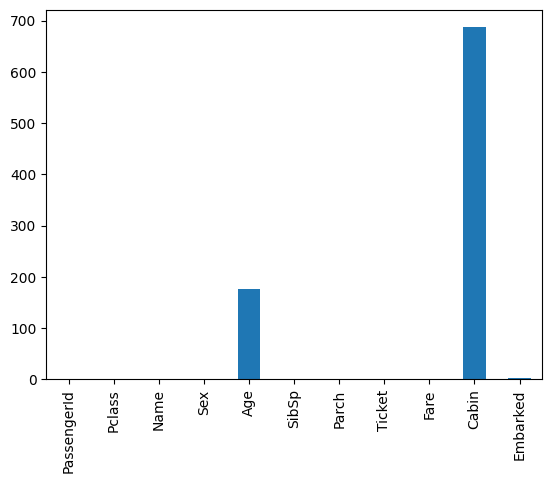

In [290]:
X_train.isnull().sum().plot.bar()

<Axes: >

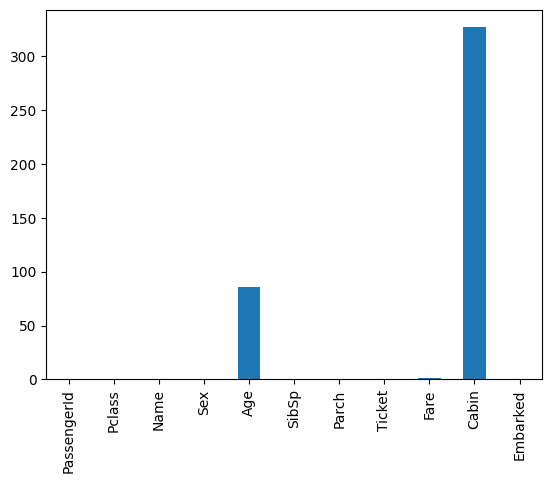

In [291]:
test.isnull().sum().plot.bar()

### Distribution + Correlation

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


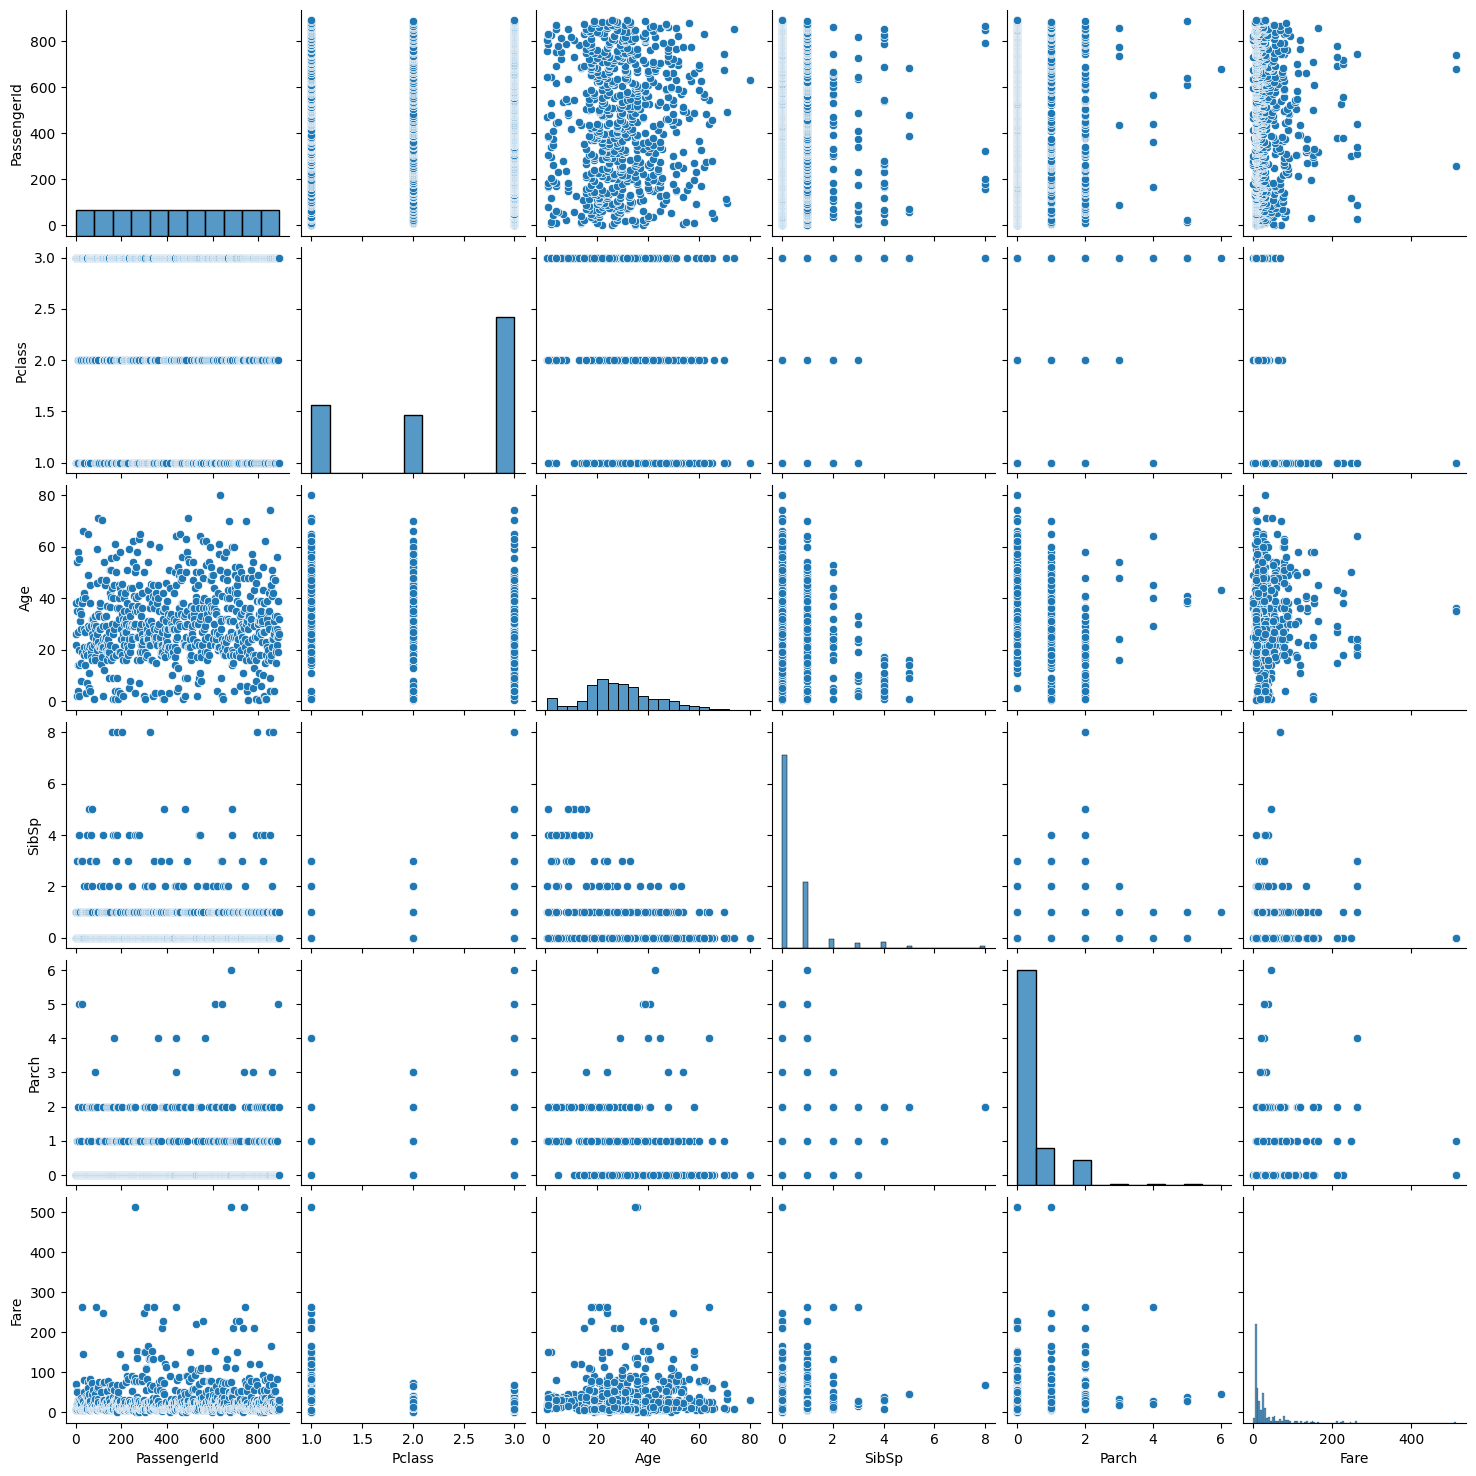

In [292]:
num_cols = [x for x in X_train.columns if X_train[x].dtype != "O"]

sns.pairplot(X_train[num_cols])

### Outliers

<Axes: >

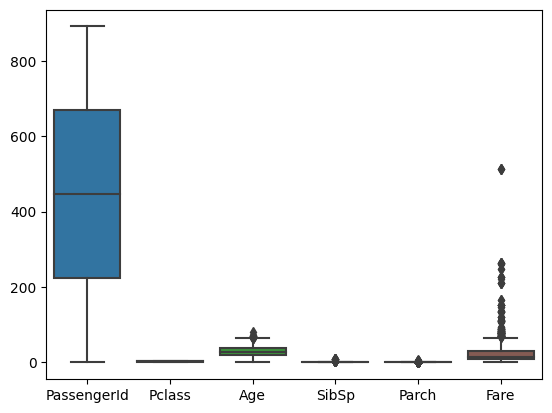

In [293]:
sns.boxplot(X_train[num_cols])

### Average age per class

In [294]:
X_train.groupby("Pclass")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


### Average fare per class

In [295]:
X_train.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

### Gender distribution of each class, and average fare paid for each gender

In [296]:
# Females generally pay higher for all 3 classes
X_train.groupby(["Pclass", "Sex"])["Fare"].mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

### Correlation with Survived

In [297]:
num_cols.append("Survived")

<Axes: >

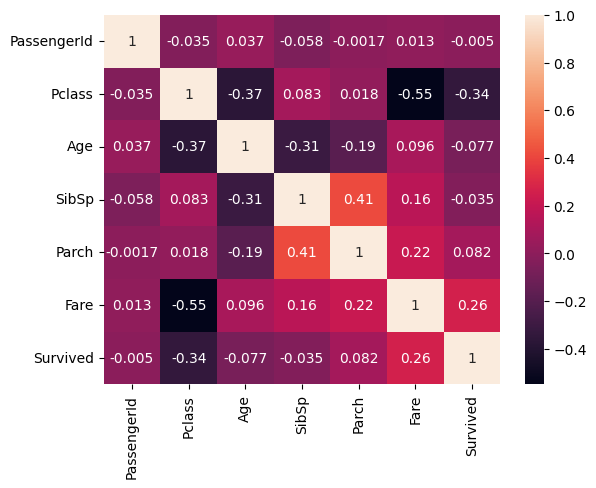

In [298]:
sns.heatmap(train[num_cols].corr(), annot=True)

# Data Preprocessing

## Missing Value Imputation

In [299]:
X_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [300]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Filling missing values in Age column with mean age of each Pclass

In the correlation plot earlier, it is evident that class 1 seems to have a older distribution of passengers, whereas class 3 has the youngest

<Axes: ylabel='Frequency'>

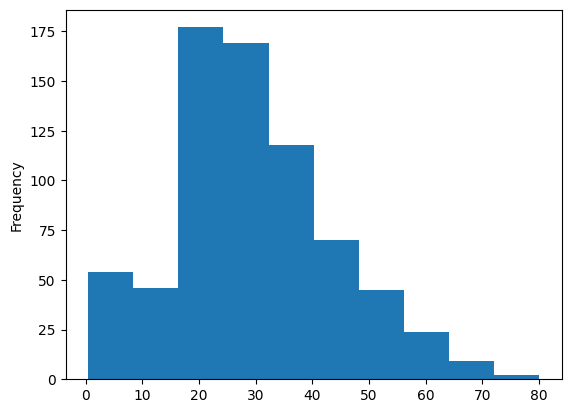

In [301]:
X_train.Age.plot.hist()

<Axes: >

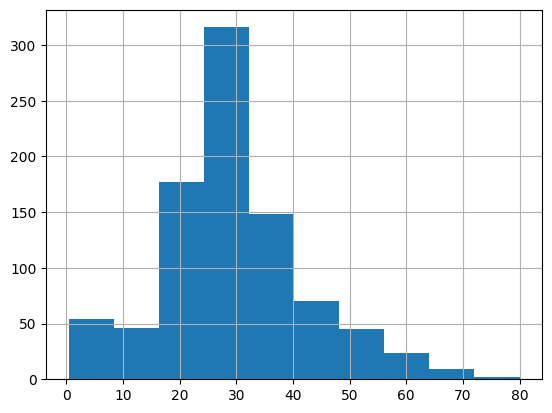

In [302]:
X_train["Age"] = np.where(X_train["Age"].isna(), X_train["Pclass"].map(X_train.groupby("Pclass")["Age"].mean()), X_train["Age"])
test["Age"] = np.where(test["Age"].isna(), test["Pclass"].map(test.groupby("Pclass")["Age"].mean()), test["Age"])

X_train["Age"].hist()

### Cabin

Completely drop cabin column as over 60% of all rows are missing

In [303]:
X_train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)

### Fare and Embark

In [304]:
# Dropping 2 missing values on embark
X_train_imputed = X_train[X_train.Embarked.isna() == False]
y_train = y_train[X_train_imputed.index]

In [305]:
# Filling with mean fare of class 3
test.Fare = test.Fare.fillna(test[test.Pclass == 3].Fare.mean())

### Final Check

In [306]:
X_train_imputed.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [307]:
test.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

## Categorical Variable Encoding

In [308]:
cat_cols = [x for x in X_train if X_train_imputed[x].dtype == "O"]

X_train_imputed[cat_cols]

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [309]:
X_train_imputed.drop(["Name", "Ticket"], axis=1, inplace=True)
test.drop(["Name", "Ticket"], axis=1, inplace=True)

/tmp/ipykernel_32/2595367043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_imputed.drop(["Name", "Ticket"], axis=1, inplace=True)


In [310]:
X_train_imputed["Sex"] = np.where(X_train_imputed["Sex"] == "male", 1, 0)
X_train_imputed["Sex"] = X_train_imputed["Sex"].astype(int)

test["Sex"] = np.where(test["Sex"] == "male", 1, 0)
test["Sex"] = test["Sex"].astype(int)

X_train_imputed["Sex"].head()

/tmp/ipykernel_32/4086412986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_imputed["Sex"] = np.where(X_train_imputed["Sex"] == "male", 1, 0)
/tmp/ipykernel_32/4086412986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_imputed["Sex"] = X_train_imputed["Sex"].astype(int)


0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [311]:
X_train_enc = pd.concat([X_train_imputed.drop("Embarked", axis=1), pd.get_dummies(X_train_imputed["Embarked"], drop_first=True)], axis=1)
test = pd.concat([test.drop("Embarked", axis=1), pd.get_dummies(test["Embarked"], drop_first=True)], axis=1)

In [312]:
X_train_enc.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,3,1,22.0,1,0,7.2500,False,True
1,2,1,0,38.0,1,0,71.2833,False,False
2,3,3,0,26.0,0,0,7.9250,False,True
3,4,1,0,35.0,1,0,53.1000,False,True
4,5,3,1,35.0,0,0,8.0500,False,True


In [313]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,892,3,1,34.5,0,0,7.8292,True,False
1,893,3,0,47.0,1,0,7.0000,False,True
2,894,2,1,62.0,0,0,9.6875,True,False
3,895,3,1,27.0,0,0,8.6625,False,True
4,896,3,0,22.0,1,1,12.2875,False,True


# Model Training and Evaluation

## Logistic Regression

In [314]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression

In [315]:
logreg = LogisticRegression()

logreg.fit(X_train_enc, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [316]:
y_logreg = np.where(logreg.predict_proba(X_train_enc)[:, 1] > 0.5, 1, 0)

print(roc_auc_score(y_train, y_logreg))

0.7657264545162328


## Decision Tree

In [317]:
from sklearn.tree import DecisionTreeClassifier

In [318]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt.fit(X_train_enc,y_train)

#Predict the response for test dataset
y_dt = dt.predict(X_train_enc)

In [319]:
print("Accuracy:",metrics.accuracy_score(y_train, y_dt))

Accuracy: 1.0


## Predicting test set and Exporting as csv

In [322]:
test_final = test.copy()
test_final["Survived"] = dt.predict(test)

test_final = test_final[["PassengerId", "Survived"]]

test_final.to_csv("predictions")

In [324]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,892,3,1,34.500000,0,0,7.8292,True,False
1,893,3,0,47.000000,1,0,7.0000,False,True
2,894,2,1,62.000000,0,0,9.6875,True,False
3,895,3,1,27.000000,0,0,8.6625,False,True
4,896,3,0,22.000000,1,1,12.2875,False,True
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,24.027945,0,0,8.0500,False,True
414,1306,1,0,39.000000,0,0,108.9000,False,False
415,1307,3,1,38.500000,0,0,7.2500,False,True
416,1308,3,1,24.027945,0,0,8.0500,False,True
